In [116]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch
import torch.nn as nn

import sys
MODEL_PATH = '/Users/anhyojun/WorkSpace/VSCode/K-Digital Training/MyModule'
sys.path.append(MODEL_PATH)
from KDTModule import *

In [66]:
# 시드 설정
torch.manual_seed(1)

In [67]:
# csv ==> DataFrame
train_mnist = pd.read_csv('../data/mnist_train.csv', header = None)
test_mnist = pd.read_csv('../data/mnist_test.csv', header = None)

In [68]:
# 시각화
train_feature = train_mnist.iloc[:,:-1]
train_target = train_mnist.iloc[:,[-1]]
test_feature = test_mnist.iloc[:,:-1]
test_target = test_mnist.iloc[:,[-1]]

In [69]:
train_feature

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
train_target

,784
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


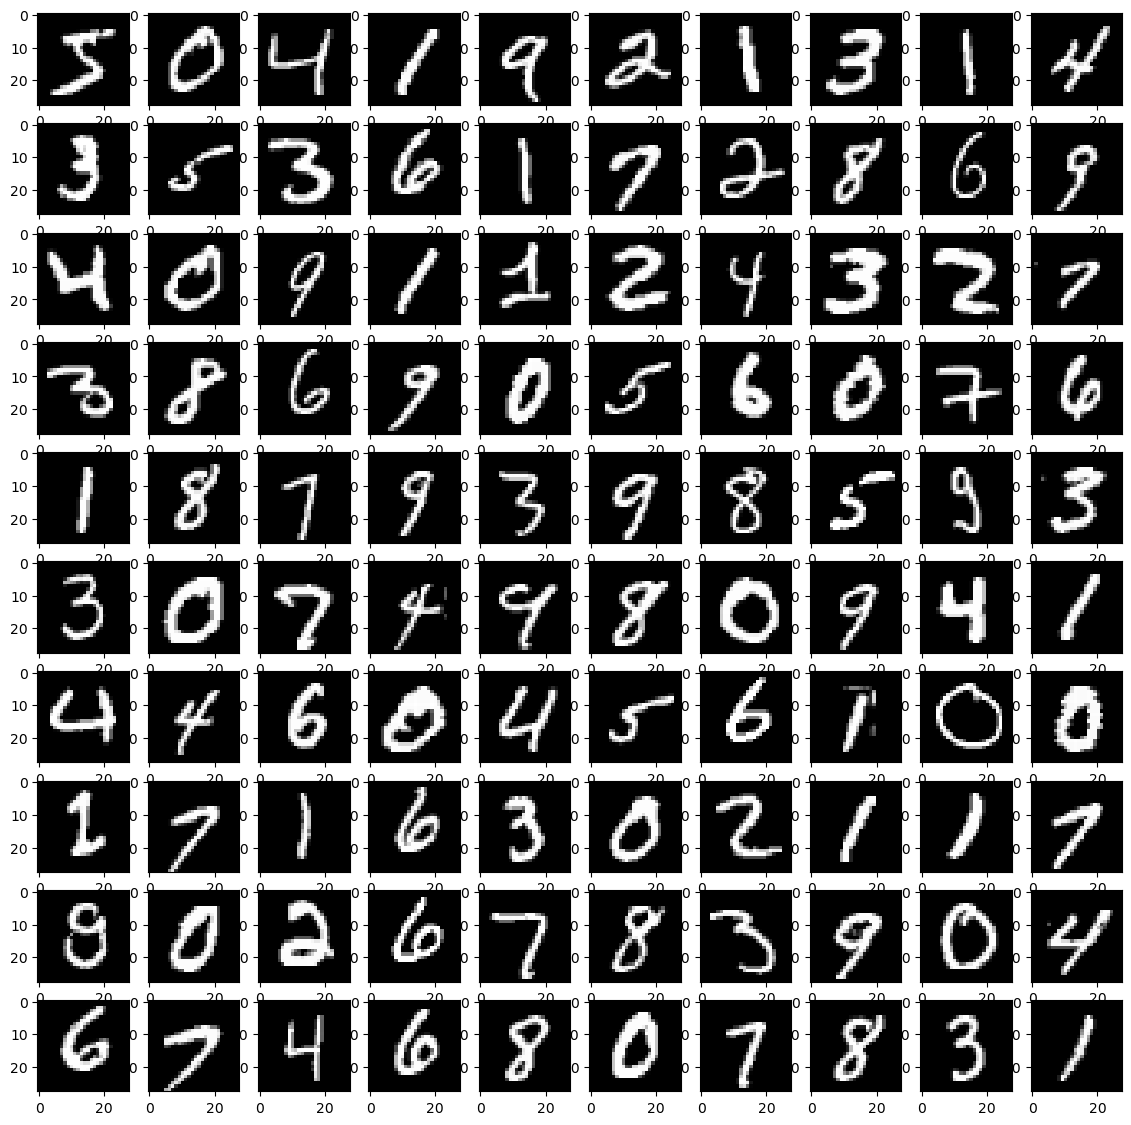

In [71]:
fig, axs = plt.subplots(10, 10, figsize = (14, 14))

for i in range(10):
    for j in range(10):
        axs[i][j].imshow(train_feature.iloc[i*10+j].to_numpy().reshape(28,28), cmap='gray')
plt.show()

In [72]:
# 피쳐 픽셀 스케일링
train_feature_scaled = train_feature
test_feature_scaled = test_feature

In [73]:
# 훈련, 검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(train_feature_scaled, train_target,
                                                    stratify=train_target,
                                                    random_state=42)

print(f"train : {X_train.shape}, {y_train.shape}")
print(f"test : {X_test.shape}, {y_test.shape}")

train : (45000, 784), (45000, 1)
test : (15000, 784), (15000, 1)


In [74]:
# 편한 이름으로 바꾸기 (굳이 안해도 됨)
train_inputDF = X_train
train_targetDF = y_train
valid_inputDF = X_test
valid_targetDF = y_test
test_inputDF = test_feature_scaled
test_targetDF = test_target

In [75]:
print(f'[train] : {train_inputDF.shape}, {train_targetDF.shape}')
print(f'[train] : {valid_inputDF.shape}, {valid_targetDF.shape}')
print(f'[train] : {test_inputDF.shape}, {test_targetDF.shape}')

[train] : (45000, 784), (45000, 1)
[train] : (15000, 784), (15000, 1)
[train] : (10000, 784), (10000, 1)


In [76]:
train_inputDF

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
44495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
valid_inputDF

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
15830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
test_inputDF

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
print(f"train_input : {train_inputDF.shape}, train_target : {train_targetDF.shape}")
print(f"valid_input : {valid_inputDF.shape}, valid_target : {valid_targetDF.shape}")
print(f"test_input : {test_inputDF.shape}, test_target : {test_targetDF.shape}")

train_input : (45000, 784), train_target : (45000, 1)
valid_input : (15000, 784), valid_target : (15000, 1)
test_input : (10000, 784), test_target : (10000, 1)


In [80]:
# 데이터셋, 데이터로더 생성

def hyper_parameter_result(batch_size, hidden_list, act_func, lr, EPOCH):
    trainDS = CustomDataset(train_inputDF, train_targetDF, feature_dim=1)
    validDS = CustomDataset(valid_inputDF, valid_targetDF, feature_dim=1)

    trainDL = DataLoader(trainDS, batch_size = batch_size)
    validDL = DataLoader(validDS, batch_size = batch_size)

    # 모델 인스턴스 생성
    model = LinearModel(input_in=784, output_out=10, hidden_list=hidden_list,
                        act_func=act_func, model_type='multiclass')

    # 옵티마이저
    adam_optim = optim.Adam(model.parameters(), lr=lr)

    # 학습, 검증
    PATH = '/Users/anhyojun/WorkSpace/VSCode/K-Digital Training/김소현 강사님/TORCH_IMAGE/숙제/model'
    result = training(trainDL, validDL, model, 'multiclass', adam_optim, EPOCH,
                    endurance_cnt=10, view_epoch=1, num_classes=10, SAVE_PATH=PATH)
    
    return result

In [81]:
result = hyper_parameter_result(32, [100, 80, 60, 40, 20], F.relu, 0.001, 100)

[EPOCH] : 1에서 모델 저장 완료.
[Loss : 1/100] Train : 0.3007, Test : 0.1935
[Score  : 1/100] Train : 0.9077, Test : 0.9464
[EPOCH] : 2에서 모델 저장 완료.
[Loss : 2/100] Train : 0.1537, Test : 0.1503
[Score  : 2/100] Train : 0.9551, Test : 0.9579
[Loss : 3/100] Train : 0.1200, Test : 0.1840
[Score  : 3/100] Train : 0.9648, Test : 0.9497
[EPOCH] : 4에서 모델 저장 완료.
[Loss : 4/100] Train : 0.0964, Test : 0.1440
[Score  : 4/100] Train : 0.9723, Test : 0.9647
[EPOCH] : 5에서 모델 저장 완료.
[Loss : 5/100] Train : 0.0836, Test : 0.1359
[Score  : 5/100] Train : 0.9762, Test : 0.9656
[Loss : 6/100] Train : 0.0727, Test : 0.1475
[Score  : 6/100] Train : 0.9787, Test : 0.9638
[Loss : 7/100] Train : 0.0678, Test : 0.1437
[Score  : 7/100] Train : 0.9805, Test : 0.9695
[Loss : 8/100] Train : 0.0631, Test : 0.1486
[Score  : 8/100] Train : 0.9814, Test : 0.9671
[Loss : 9/100] Train : 0.0583, Test : 0.1635
[Score  : 9/100] Train : 0.9832, Test : 0.9652
[Loss : 10/100] Train : 0.0522, Test : 0.1530
[Score  : 10/100] Train : 0.98

(<Figure size 1400x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='EPOCH', ylabel='Loss'>,
        <Axes: title={'center': 'Score'}, xlabel='EPOCH', ylabel='Loss'>],
       dtype=object))

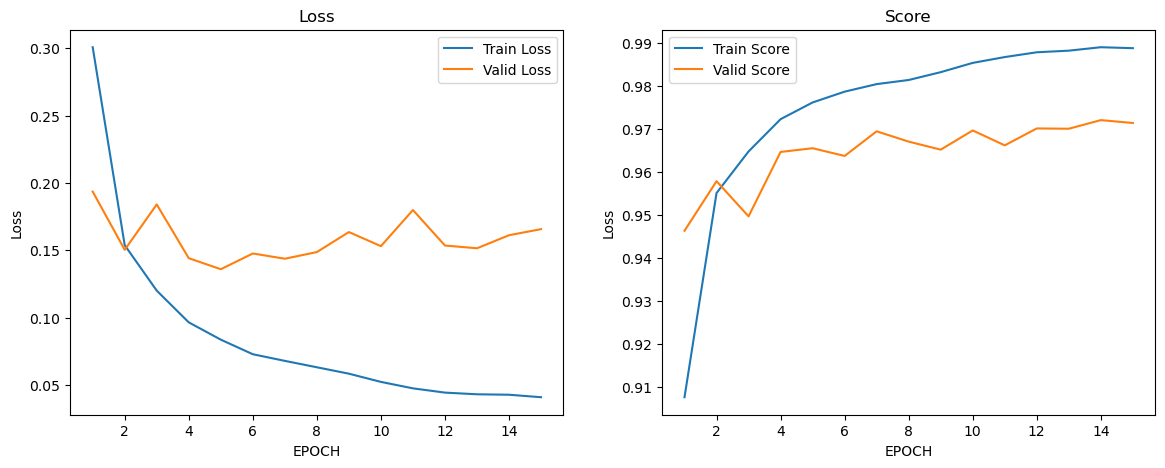

In [82]:
DrawPlot(result)

In [83]:
loss_train, loss_test, score_train, score_test = result

In [85]:
score_train[4], score_test[4]

(0.9761904761904762, 0.9655517057569296)

> 4 에포크에서 가장 좋은 성능 ()

In [86]:
model = LinearModel(input_in=784, output_out=10, hidden_list=[100, 80, 60, 40, 20],
                    act_func=F.relu, model_type='multiclass')

In [87]:
# 저장한 모델 불러오기
model.load_state_dict(torch.load('best_mnist_model.pth',
                                 weights_only=True)) # 모델 파라미터를 불러오는 경우

<All keys matched successfully>

In [90]:
testDS = CustomDataset(test_inputDF, test_targetDF, feature_dim=1)
testDL = DataLoader(testDS, batch_size = 32)

In [91]:
# 테스트 진행
test_result = testing(testDL, model, model_type='multiclass', num_classes=10)

In [92]:
test_result

(0.13900321671057095, 0.9654552715654952)

In [93]:
print(f"Test Loss : {test_result[0]:.4f}, Test Score : {test_result[1]:.4f}")

Test Loss : 0.1390, Test Score : 0.9655


In [94]:
testDL.dataset[0][0].shape

torch.Size([784])

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [ ]:
train_feature.iloc[i*10+j].to_numpy().reshape(28,28)

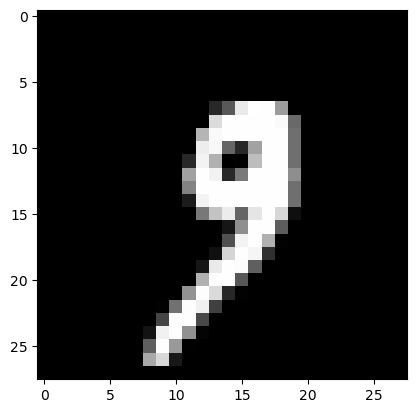

real label : 9, pred label : 9


In [108]:
INDEX = 1000
test_inputTS = torch.FloatTensor(test_inputDF.values)
input_sample = test_inputTS[INDEX].reshape(1,-1) # 모델에 입력할 때 일반적으로 2차원 텐서로 전달

# 예측 수행
pred_value = torch.argmax(model(input_sample), dim=1).item() # dim=1을 해야 여러개의 행이 들어왔을 때 행 별로 계산됨
real_value = test_target.iloc[INDEX].item()

plt.imshow(test_feature.iloc[INDEX].to_numpy().reshape(28,28), cmap='gray')
plt.show()
print(f"real label : {real_value}, pred label : {pred_value}")

In [121]:
test_inputTS = torch.FloatTensor(test_inputDF.values)
pred_list = torch.argmax(model(test_inputTS), dim=1).tolist()
real_list = test_targetDF[784].tolist()

print(classification_report(real_list, pred_list))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.94      0.96      1032
           3       0.98      0.97      0.97      1010
           4       0.94      0.98      0.96       982
           5       0.97      0.97      0.97       892
           6       0.95      0.98      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.94      0.95       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

